              ^DJI
count  7306.000000
mean      0.000290
std       0.010589
min      -0.082005
25%      -0.004457
50%       0.000502
75%       0.005464
max       0.105083
^DJI   -0.011049
Name: 0.1, dtype: float64


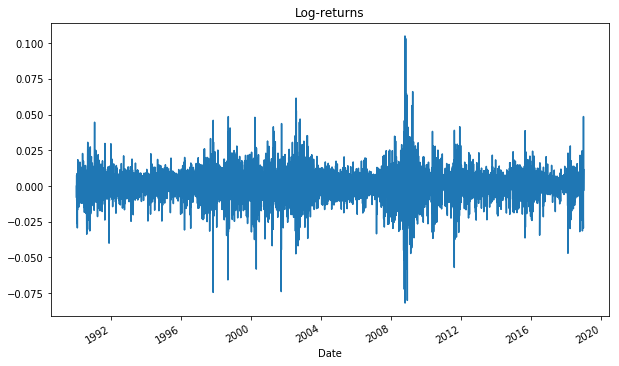

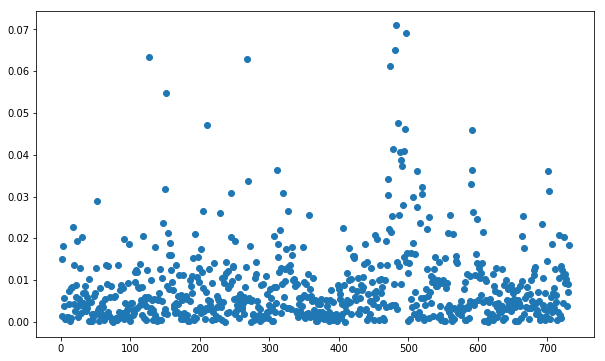

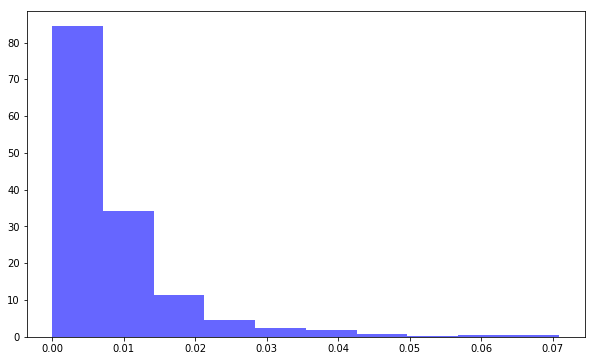

(0.4827981380004423, 8.565360234973446e-06, 0.005797391868692649)


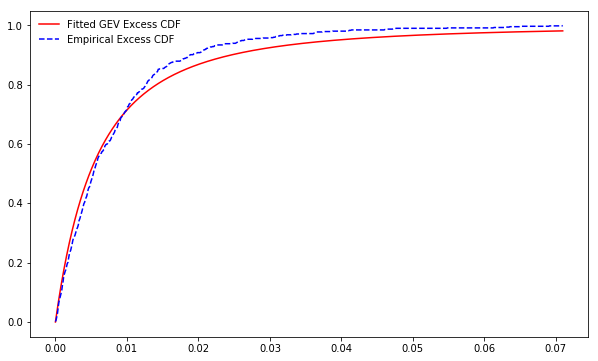

In [9]:
#This program applies fits GPD to excess losses of stock/index

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto as gpd

# We will look at stock prices overtime
start = datetime.datetime(1990,1,1)
end = datetime.datetime(2018,12,31)
#end = datetime.date.today()

from pandas_datareader import data as wb  

ticker = '^DJI' 
df = pd.DataFrame()
df[ticker] = wb.DataReader(ticker, data_source='yahoo', start=start, end=end)['Close']
log_returns = np.log(1 + df.pct_change()).dropna()
log_returns.plot(figsize=(10, 6),legend = False, title='Log-returns');

ds=log_returns.describe()
print(ds)


u=log_returns.quantile(0.1)
print(u)
x=log_returns[log_returns<u]
y=(x.abs()-u.abs()).dropna()
#y=x.abs().dropna()
y=np.array(y)

t = np.linspace(1,np.size(y),np.size(y))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, y, "o")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(y, normed=True, alpha=0.6,color='blue', label='Annual maximum losses')
plt.show()
fit = gpd.fit(y)
print(fit)

fig, ax = plt.subplots(figsize=(10, 6))

xs = np.sort(y)

vs=np.unique(xs)
 # create a sorted series of unique data
cdfx = np.sort(vs)
  # x-data for the ECDF: evenly spaced sequence of the uniques
x_values = np.linspace(start=min(cdfx),
stop=max(cdfx),num=len(cdfx))
    
    # size of the x_values
size_data = y.size
    # y-data for the ECDF:
y_values = []
for i in x_values:
        # all the values in raw data less than the ith value in x_values
            temp = y[y <= i]
        # fraction of that value with respect to the size of the x_values
            value = temp.size / size_data
        # pushing the value in the y_values
            y_values.append(value)
    # return both x and y values    


#plot the fit


plt.plot(x_values, gpd.cdf(x_values,*fit),color='r', label='Fitted GEV Excess CDF')
plt.plot(x_values, y_values,color='b', linestyle='--', label='Empirical Excess CDF')
ax.legend(loc='best', frameon=False)
#x.plot(t, pdf)
plt.show()
